In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [3]:
plt.style.use("ggplot")


In [4]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
df['species'] = df['target'].map({0:'setosa',1:'versicolor',2:'viginica'})
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,viginica
146,6.3,2.5,5.0,1.9,2,viginica
147,6.5,3.0,5.2,2.0,2,viginica
148,6.2,3.4,5.4,2.3,2,viginica


In [12]:
df_mean= df.groupby('species').mean()
df_mean.pop("target")
df_mean

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
viginica,6.588,2.974,5.552,2.026


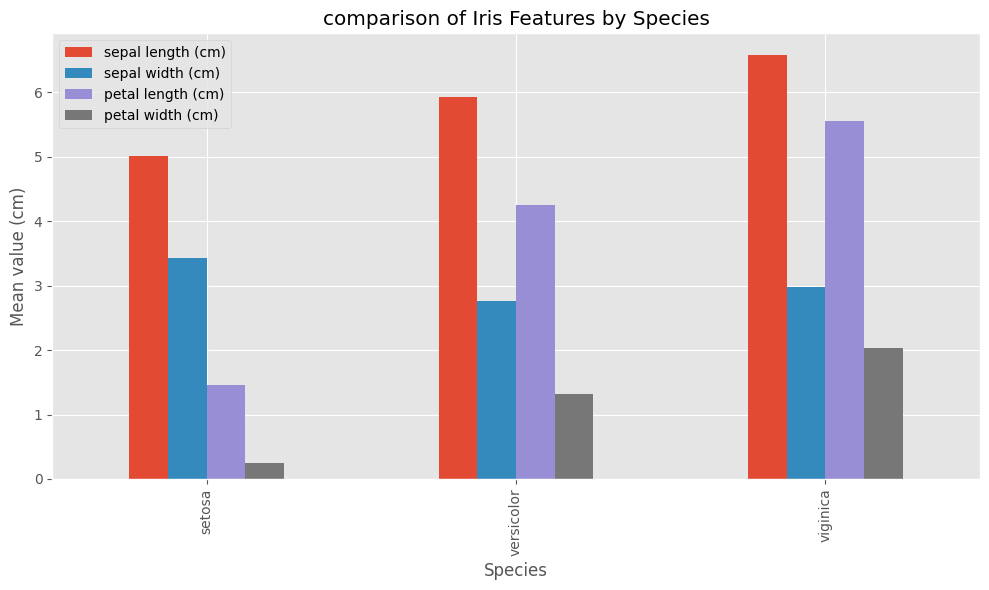

In [14]:
df_mean.plot(kind='bar',figsize=(10,6))
plt.title('comparison of Iris Features by Species')
plt.ylabel('Mean value (cm)')
plt.xlabel('Species')
plt.tight_layout()
plt.show()

In [17]:
features = df.columns[:-2]

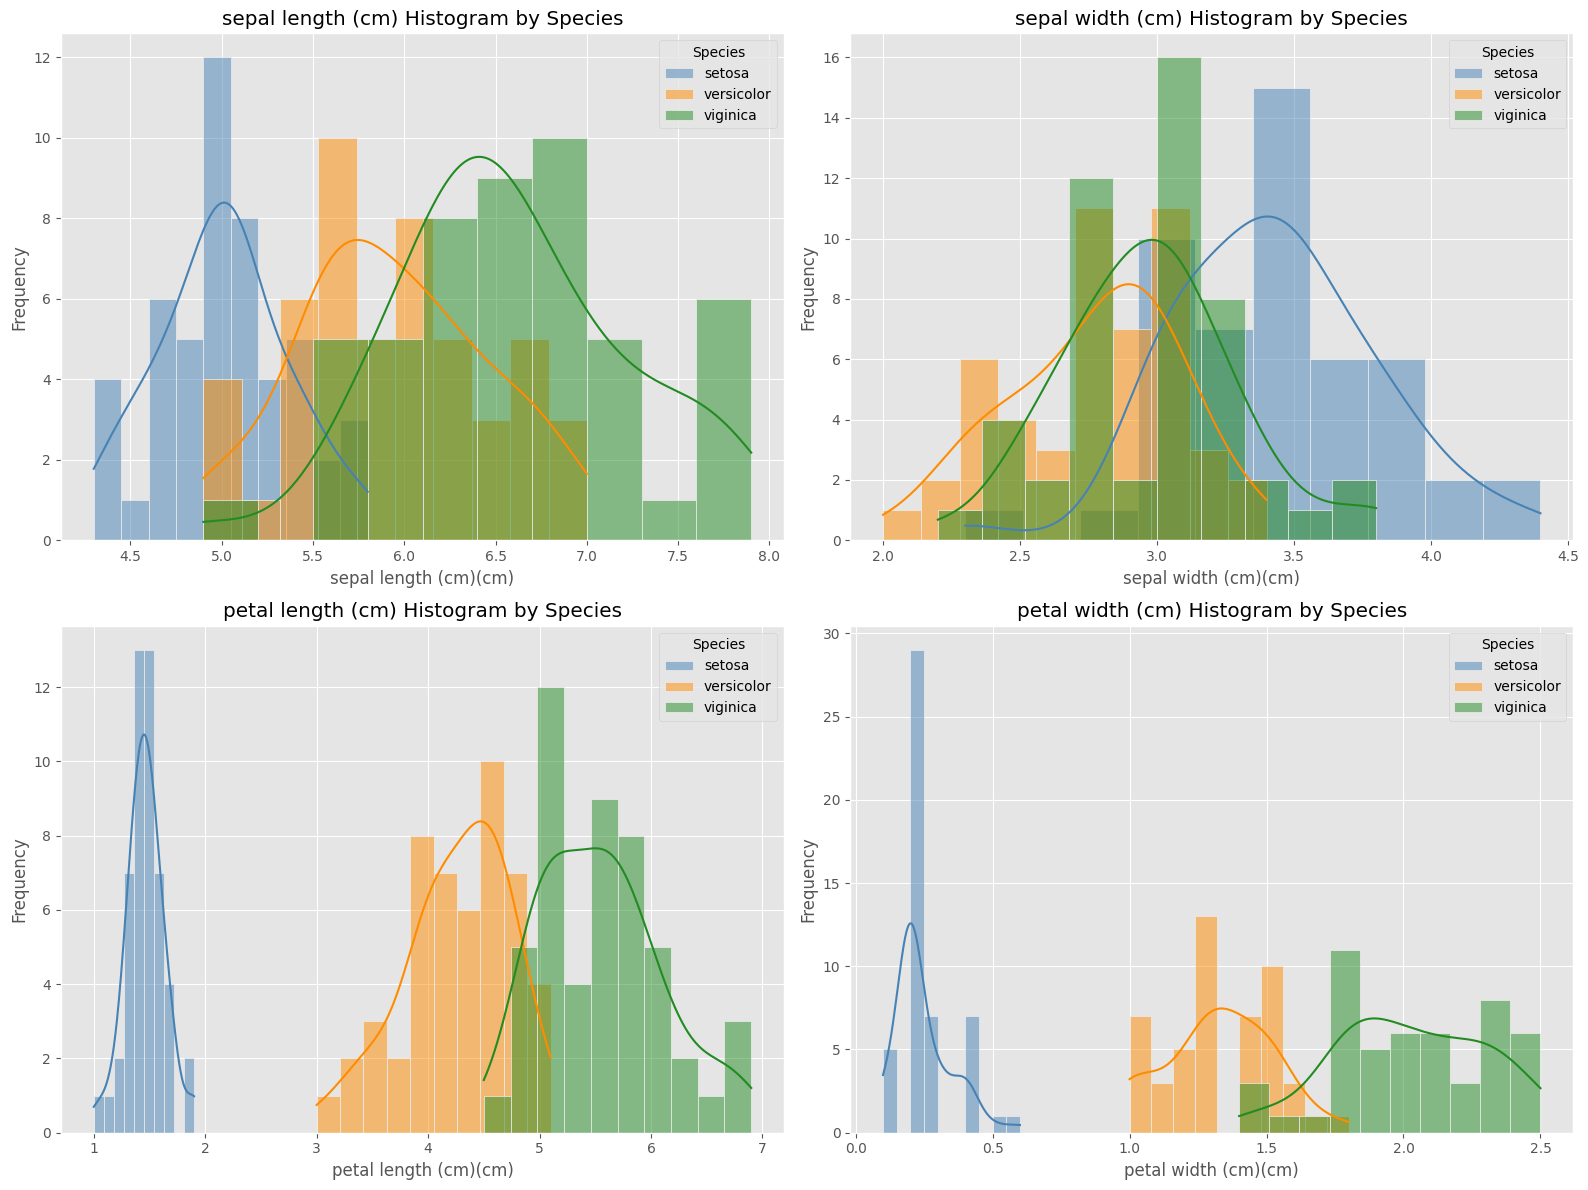

In [22]:
species_list = df.loc[:, "species"].unique().tolist()
colors= ['steelblue','darkorange','forestgreen']
plt.figure(figsize=(16,12))
for idx, feature in enumerate(features):
    plt.subplot(2,2,idx+1)
    for sp, color in zip(species_list,colors):
        sp_df= df[df['species']==sp]
        sns.histplot(
            sp_df[feature],
            bins=10,
            kde=True,
            color=color,
            label=sp,
            alpha=0.5
        )
    plt.title(f'{feature} Histogram by Species')
    plt.xlabel(f'{feature}(cm)')
    plt.ylabel(f'Frequency')
    plt.legend(title='Species')
plt.tight_layout()
plt.show()

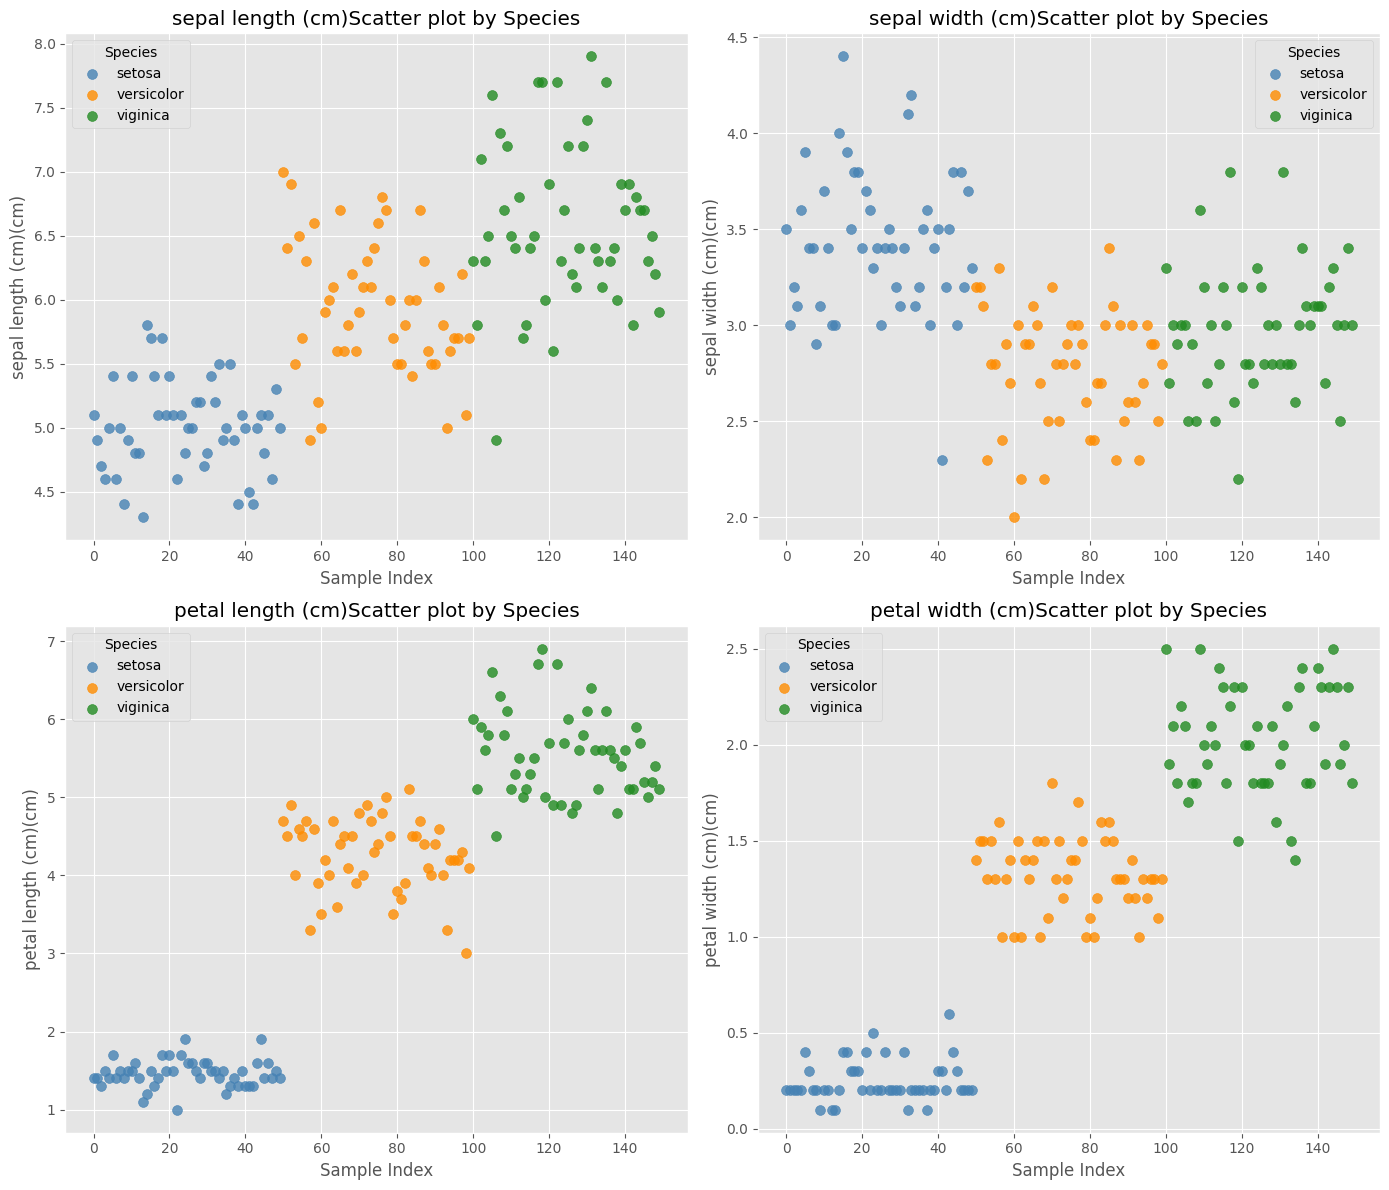

In [26]:
plt.figure(figsize=(14,12))
for idx, feature in enumerate(features):
    plt.subplot(2,2,idx+1)
    for sp, color in zip(species_list, colors):
        sp_df = df[df['species']==sp]
        plt.scatter(sp_df.index,sp_df[feature],label=sp,color=color,alpha=0.8,s=50)
    plt.title(f'{feature}Scatter plot by Species')
    plt.xlabel('Sample Index')
    plt.ylabel(f'{feature}(cm)')
    plt.legend(title='Species')
plt.tight_layout()
plt.show()
    

In [31]:
X=df.iloc[:,:-2]
X_mean=X.mean()
X_std=X.std()
X_norm=(X-X_mean)/X_std
X_norm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052
...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994
146,0.551486,-1.278680,0.703564,0.919223
147,0.793012,-0.131539,0.816859,1.050416
148,0.430722,0.786174,0.930154,1.443994


In [38]:
Y= df["target"]
X_train,X_test,Y_train,Y_test = train_test_split(X_norm,Y,test_size=0.2,random_state=42) 

X_train_tensor=torch.tensor(X_train.values, dtype=torch.float32)
Y_train_tensor=torch.tensor(Y_train.values, dtype=torch.long)
X_test_tensor=torch.tensor(X_test.values, dtype=torch.float32)
Y_test_tensor=torch.tensor(Y_test.values,dtype=torch.long)
batch_size= 32
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)

In [39]:
model = nn.Sequential(
    nn.Linear(4,20),nn.BatchNorm1d(20),nn.ReLU(),nn.Dropout(0.5),
    nn.Linear(20,10),nn.BatchNorm1d(10),nn.ReLU(),nn.Dropout(0.5),
    nn.Linear(10,3),
    
)

In [40]:
model

Sequential(
  (0): Linear(in_features=4, out_features=20, bias=True)
  (1): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=20, out_features=10, bias=True)
  (5): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=10, out_features=3, bias=True)
)

In [41]:
def init_weights(layer):
    if isinstance(layer,nn.Linear):
        if layer.out_features==3:
            nn.init.xavier_uniform_(layer.weight)
        else:
            nn.init.kaiming_uniform_(layer.weight,nonlinearity='relu')
            nn.init.zeros_(layer.bias)

In [43]:
model.apply(init_weights)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [47]:
epochs =1000
for epoch in range(epochs):
    total_loss=0
    for batch_X, batch_Y in train_loader:
        optimizer.zero_grad()
        outputs=model(batch_X)
        loss= criterion(outputs, batch_Y)
        loss.backward()
        optimizer.step()
        total_loss+= loss.item()
        if (epoch+1) % 10 ==0:
            avg_loss = total_loss /len(train_loader)
            print(f'Epoch[{epoch+1}/{epochs}], 평균손실:{avg_loss:.4f}')

Epoch[10/1000], 평균손실:0.0552
Epoch[10/1000], 평균손실:0.1016
Epoch[10/1000], 평균손실:0.1959
Epoch[10/1000], 평균손실:0.2406
Epoch[20/1000], 평균손실:0.0889
Epoch[20/1000], 평균손실:0.1650
Epoch[20/1000], 평균손실:0.2311
Epoch[20/1000], 평균손실:0.2863
Epoch[30/1000], 평균손실:0.0825
Epoch[30/1000], 평균손실:0.1476
Epoch[30/1000], 평균손실:0.2825
Epoch[30/1000], 평균손실:0.3620
Epoch[40/1000], 평균손실:0.0357
Epoch[40/1000], 평균손실:0.2669
Epoch[40/1000], 평균손실:0.3352
Epoch[40/1000], 평균손실:0.4213
Epoch[50/1000], 평균손실:0.0590
Epoch[50/1000], 평균손실:0.3033
Epoch[50/1000], 평균손실:0.3867
Epoch[50/1000], 평균손실:0.4813
Epoch[60/1000], 평균손실:0.0538
Epoch[60/1000], 평균손실:0.1016
Epoch[60/1000], 평균손실:0.1385
Epoch[60/1000], 평균손실:0.2115
Epoch[70/1000], 평균손실:0.0386
Epoch[70/1000], 평균손실:0.1063
Epoch[70/1000], 평균손실:0.1674
Epoch[70/1000], 평균손실:0.2145
Epoch[80/1000], 평균손실:0.0677
Epoch[80/1000], 평균손실:0.1293
Epoch[80/1000], 평균손실:0.2093
Epoch[80/1000], 평균손실:0.2672
Epoch[90/1000], 평균손실:0.0908
Epoch[90/1000], 평균손실:0.2018
Epoch[90/1000], 평균손실:0.2706
Epoch[90/1000], 평균손실

In [48]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    predicted = torch.argmax(test_outputs, dim=1)
    accuracy = (predicted== Y_test_tensor).float().mean()
    print(f'\n테스트 정확도 : {accuracy.item()*100:.2f}%')


테스트 정확도 : 100.00%


In [50]:
new_iris_data = [[5.8,2.8,5.1,2.4]]
new_iris_data

[[5.8, 2.8, 5.1, 2.4]]

In [54]:
new_iris_df = pd.DataFrame(new_iris_data,columns=X.columns)
new_iris_norm = (new_iris_df- X_mean)/X_std
new_iris_tensor= torch.tensor(new_iris_norm.values, dtype=torch.float32)
new_iris_tensor

tensor([[-0.0523, -0.5904,  0.7602,  1.5752]])

In [55]:
model.eval()
with torch.no_grad():
    output = model(new_iris_tensor)
    print(f"output = {output}")
    predicted_class = torch.argmax(output,dim=1).item()
    print(f"predicted_class={predicted_class}")
    class_labels = ['setosa','versicolor','virginica']
    predicted_species = class_labels[predicted_class]
    print(f"\n예상 품종:{predicted_species}")

output = tensor([[-23.9015,   1.1128,   8.5436]])
predicted_class=2

예상 품종:virginica
